# Modern Physics Homework 5-2
### Schrodinger Code




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# Constants - all energies in eV, lengths in nm
hbarc = 197  # hbar * c [eV nm]
mc2 = 511000 # electron mass energy [eV]

Evaluate Schrodingers Equation with various potentials:  
$\psi'' = -\frac{2 mc^2 (E-U)}{(\hbar c)^2} \psi $

To use python's differential equation tools, we need to define a function that returns the 1st and 2nd derivatives.  We will define a vector `y` as $y[0] = \psi$ and $y[1]=\psi'$.  Then our function returns:
* the derivative of $y[0]$ which is $y[1]$
* the derivative of $y[1]$, or $\psi''$, which we get from Schrodinger
 

In [3]:
# Infinite Square Well: U=0 inside well and infinity outside
# Textbook equation (5.15)
def ISW(x, y):
  U=0
  k2 = 2*mc2*(E-U)/(hbarc**2)   # k squared
  return [y[1], -k2 * y[0]]     # y'' = -k^2 y   

In [4]:
# Finite Square Well: U=0 inside well and U0 outside
# Textbook equation (5.15) inside and (5.17) outside
U0 = 400  # height of potential outside well
L = 0.1
def FSW(x, y):
    if x<0 or x>L : k2 = 2*mc2*(U0-E)/(hbarc**2)   # k squared outside well
    else: k2 = -2*mc2*E/(hbarc**2)   # k squared inside well
    return [y[1], k2 * y[0]] # y'' = k^2 y   (+ outside, - inside)


# Example 1 - ISW
Show the wavefunction with a fixed energy in a given potential.

We do this by starting at the left side and numerically integrating the Schrodinger Equation across to the right side.  This code does **not** consider boundary conditions


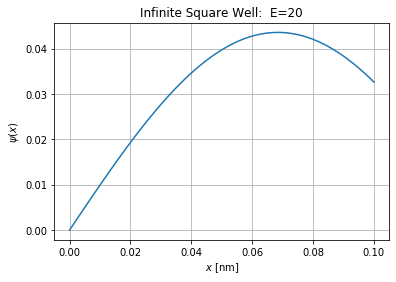

The wavefunction at x=L is  0.032639281972084856


In [5]:
# Show Wavefunction with a fixed energy
E = 20  # energy [eV]
L = 0.1  # width [nm]

x_range = [0, L]
y0 = [0, 1]  # initial values of psi and psi', only the signs matter here

sol = integrate.solve_ivp(ISW,x_range,y0,max_step=0.001) # first argument is the potential function

plt.figure()
plt.plot(sol.t, sol.y[0])
plt.title(f'Infinite Square Well:  E={E}')
plt.xlabel('$x$ [nm]')
plt.ylabel('$\psi(x)$')

plt.grid()
plt.show()
print("The wavefunction at x=L is ",sol.y[0,-1])

# Example 2 - FSW


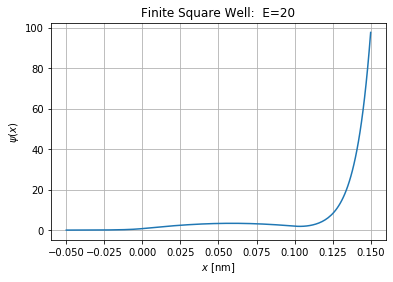

The wavefunction at the right edge is  97.67421303941197


In [6]:
E = 20 # energy [eV]
y0 = [0, 1]
x_range = [-0.05, 0.15]
sol = integrate.solve_ivp(FSW,x_range,y0,max_step=0.001)

plt.figure()
plt.plot(sol.t, sol.y[0])
plt.title(f'Finite Square Well:  E={E}')
plt.xlabel('$x$ [nm]')
plt.ylabel('$\psi(x)$')

plt.grid()
plt.show()
print("The wavefunction at the right edge is ",sol.y[0,-1])